## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.


<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
# Shape returns (row,column)
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
conv = (df['converted'] == 1).sum()

prop_converted = conv / df.shape[0]
prop_converted

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

#### The number of times the new_page and treatment don't match = 3893

In [6]:
old_unmatch = df.query('landing_page == "old_page" and group == "treatment"')
new_unmatch = df.query('landing_page == "new_page" and group == "control"')

unmatch = old_unmatch+new_unmatch

unmatch.shape[0]

3893

f. Do any of the rows have missing values?

In [7]:
df.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [8]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [9]:
# No missing values in row
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
df2 = df.query('landing_page != "new_page" and group != "treatment" or landing_page != "old_page" and group != "control"  ')


In [11]:
df2.shape

(290585, 5)

In [12]:
df2.describe()

,user_id,converted
count,290585.000000,290585.000000
mean,788004.825246,0.119597
std,91224.582639,0.324490
min,630000.000000,0.000000
25%,709035.000000,0.000000
50%,787995.000000,0.000000
75%,866956.000000,0.000000
max,945999.000000,1.000000


In [13]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [14]:
(df2['user_id'].nunique())

290584

b. There is one **user_id** repeated in **df2**.  What is it?

Repeated user_id = 773192

c. What is the row information for the repeat **user_id**? 

In [15]:
# Reference:
# https://stackoverflow.com/questions/14657241/how-do-i-get-a-list-of-all-the-duplicate-items-using-pandas-in-python

df2[df2['user_id'].duplicated() == True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
# Removing duplicates using index

df2 = df2[~df2['user_id'].duplicated(keep='first')]

In [17]:
# Checking to see if row has been removed or not (Removed since shape changed)
df2.shape

(290584, 5)

In [18]:
# Double checking to see duplicated is deleted or not
df2[df2['user_id'].duplicated() == True]

,user_id,timestamp,group,landing_page,converted


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [19]:
converted_prob = df2.query('converted == 1')

converted_prob = converted_prob.shape[0] / df2.shape[0] 
converted_prob

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [20]:
# Since conversions are boolean values so we use mean to find Probability
df2['converted'][df2.group == "control"].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [21]:
df2['converted'][df2.group == "treatment"].mean()

0.11880806551510564

In [22]:
# Can alos find both probabilities by grouping them together

df3 = df.groupby('group')
df3.describe()

converted                                                user_id  \
              count      mean       std  min  25%  50%  75%  max     count   
group                                                                        
control    147202.0  0.120399  0.325429  0.0  0.0  0.0  0.0  1.0  147202.0   
treatment  147276.0  0.118920  0.323695  0.0  0.0  0.0  0.0  1.0  147276.0   

                                                                      \
                    mean           std       min       25%       50%   
group                                                                  
control    788123.098035  91278.896888  630002.0  709287.0  788053.5   
treatment  787825.226283  91142.800641  630000.0  708729.5  787837.5   

                                
                 75%       max  
group                           
control    867155.50  945998.0  
treatment  866693.75  945999.0

d. What is the probability that an individual received the new page?

In [23]:
prob_new_page = df2.query('landing_page == "new_page"')
prob_new_page = prob_new_page.shape[0] / df2.shape[0] 
prob_new_page

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.


**We cannot exactly conclude that the new treatment page leads to more conversions even though the conversion rate of treatment group is 11.8% and conversion rate of control group 12.0% which is approximately equal. Also we can see that the old pages tend to do perform better, but with a very small margin. However, it's too early to say that the new page leads to more conversions.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**
### Null Hypothesis: **$p_{old}$** >= **$p_{new}$**
### Alternative Hypothesis: **$p_{old}$** < **$p_{new}$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [24]:
# converted means converted = 1)
p_new = df2['converted']
p_new.mean()

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [25]:
# Both have same conversion rate
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [26]:
n_new = df2.query('group == "treatment"').shape[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [27]:
n_old = df2.query('group == "control"').shape[0]
n_old 

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [28]:
new_page_converted = np.random.choice([1,0], size=n_new, p=[p_new.mean(), (1-p_new.mean())])
new_page_converted.mean()

0.11918656665060905

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [29]:
old_page_converted = np.random.choice([1,0], size=n_old, p=[p_old.mean(), (1-p_old.mean())])
old_page_converted.mean()

0.11842449440367857

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [30]:
new_page_converted.mean() - old_page_converted.mean()

0.00076207224693047859

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [31]:
p_diffs = []         # Declaring a numpy array

for i in range(10000):
    new_page_converted = np.random.choice([1,0], size=n_new, p=[p_new.mean(), (1-p_new.mean())])
    old_page_converted = np.random.choice([1,0], size=n_old, p=[p_old.mean(), (1-p_old.mean())])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [32]:
# Converting p_diffs to numpy array
p_diffs = np.array(p_diffs)

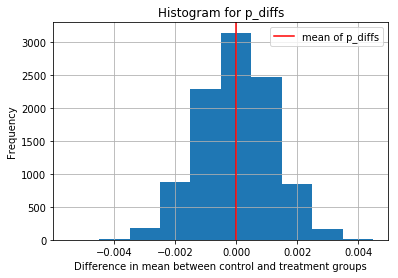

In [33]:
plt.hist(p_diffs);
plt.xlabel('Difference in mean between control and treatment groups')
plt.title('Histogram for p_diffs')
plt.ylabel('Frequency');
plt.axvline(x=p_diffs.mean(), color='red' , label='mean of p_diffs');
plt.grid()
plt.legend();

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [34]:
# Finding the p-value
actual_diff = df2.converted[df2.group == 'treatment'].mean() - df2.converted[df2.group == 'control'].mean()
(p_diffs > actual_diff).mean()

0.90759999999999996

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**This is what we call in statistical terms p-value.A p-value is the probability of observing your statistic if the null hypothesis is true. A p value is used in hypothesis testing to help you support or reject the null hypothesis. In this case the p-value is 0.9 and it is greater than 0.05. 
Hence we fail to reject the Null Hypothesis and can say that the new pages doesn't perform better than the old pages.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [35]:
import statsmodels.api as sm

convert_old = df2.query('group == "control" and converted == 1').shape[0]
convert_new = df2.query('group =="treatment" and converted == 1').shape[0]
n_old = df2.query('group == "control"').shape[0]
n_new = df2.query('group == "treatment"').shape[0]

convert_old, convert_new, n_old, n_new

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [36]:
# Since Alternative Hypothesis:  𝑝𝑜𝑙𝑑  <  𝑝𝑛𝑒𝑤, so using 'smaller'

z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old,n_new], alternative ='smaller')
z_score, p_value

(1.3109241984234394, 0.90505831275902449)

In [37]:
# There is a slight difference in p-value so our result is very accurate
diff_in_p_value = p_value - (p_diffs > actual_diff).mean()
diff_in_p_value

-0.0025416872409754765

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**A positive z-score of +1.31 suggests that our datapoints are higher than the mean average. Also, the conversion rate of the new landing page is only 1.31 from the Z-test. This is less than the critical value of +1.96. Hence, we fail to reject the Null Hypothesis. Moreover, our findings from part j and k are approximately the same with a difference of 0.0025 only. Hence with this computation we can confidently fail to reject the Null Hypothesis.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Since we are predicting only two quantities so we will apply Logistic Regression here**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [44]:
df2['intercept'] = 1
df2[['control', 'treatment']] = pd.get_dummies(df2['group'])

In [45]:
# Check to see if correctly done or not
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [46]:
import statsmodels.api as sm
logit = sm.Logit(df2['converted'], df2[['intercept', 'treatment']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [47]:
results = logit.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


In [48]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-05-29 01:37 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
treatment    -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br> 

**Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Answer**
Our Hypothesis in Logistic Regression is:

Null Hypothesis: $p_{new}$ = $p_{old}$

Alternative Hypothesis: $p_{new}$ != $p_{old}$

The p-value is 0.1899 in Part 3 because now we used a logistic regression model and also our Null Hypothesis is changed so p-value is also changed. The most important reason for difference between p-values is that in Part 2 we have performed one tailed test and in Part 3 we are performing two tailed test.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer:**
It is always a good idea to consider other factors to add into our regression model because this helps us to provide a more complete and accurate picture. Many other factors like CTR(Click Through Rate), Average Time Spent on the website and many other factors could be added. However, the disadvantage of  adding multiple variable is that, it makes it more and more likely that you will overfit your model to the training data.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [49]:
df_countries = pd.read_csv('countries.csv')
df_countries.head(3)

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK


In [57]:
# Merging using intersection of the two datasets on 'user_id'
merged_df = df_countries.set_index('user_id').join(df2.set_index('user_id'), how='inner')
merged_df.head()

,country,timestamp,group,landing_page,converted,intercept,control,treatment
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1


In [55]:
# US is the TOP country
merged_df['country'].describe()

count     290584
unique         3
top           US
freq      203619
Name: country, dtype: object

In [62]:
merged_df['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [71]:
# Creating necessary dummy variables 
merged_df[['Canada','UK','US']] = pd.get_dummies(merged_df['country'])
merged_df.head(3)

,country,timestamp,group,landing_page,converted,intercept,control,treatment,UK,US,Canada
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,1,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,1,0,0


In [73]:
# [when working with dummies drop one before analysis] 
# Dropping CA 
merged_df.drop(['Canada'], axis=1, inplace = True)


In [74]:
# Checking to see if Canada dropped or not
merged_df.head(1)

,country,timestamp,group,landing_page,converted,intercept,control,treatment,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,1,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [76]:
# Creating ab_page column
merged_df['ab_page'] = 0

In [80]:
ab_page_index = merged_df[merged_df['group']=='treatment'].index
merged_df.loc[ab_page_index, "ab_page"] = 1

In [81]:
# Checking to see if column added successfully
merged_df.head()

,country,timestamp,group,landing_page,converted,intercept,control,treatment,UK,US,ab_page
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,1,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,1,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,1,0,1


In [82]:
# Creating new variables to include in regression model
merged_df['UK_ab_page'] = merged_df['UK'] * merged_df['ab_page']

In [83]:
merged_df['US_ab_page'] = merged_df['US'] * merged_df['ab_page']

We would now like to look at an interaction between page and country to see if there are significant effects on conversion.  

In [89]:
# 'intercept', 'ab_page', 'UK', 'US','US_ab_page','UK_ab_page' as independent variable
# 'converted' as dependent variable

# Excluded Canada and setting it as baseline

df['intercept'] = 1
lm = sm.OLS(merged_df['converted'], merged_df[['intercept','ab_page','UK','UK_ab_page','US','US_ab_page']])
res2 = lm.fit()
res2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:              OLS              Adj. R-squared:     0.000      
Dependent Variable: converted        AIC:                170541.0521
Date:               2020-05-29 02:34 BIC:                170604.5300
No. Observations:   290584           Log-Likelihood:     -85265.    
Df Model:           5                F-statistic:        1.466      
Df Residuals:       290578           Prob (F-statistic): 0.197      
R-squared:          0.000            Scale:              0.10529    
----------------------------------------------------------------------
               Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
----------------------------------------------------------------------
intercept      0.1188     0.0038   31.0570   0.0000    0.1113   0.1263
ab_page       -0.0069     0.0054   -1.2766   0.2018   -0.0174   0.0037
UK             0.0012     0.0042    0.2960   0.7672   -0.0070   0.0094
UK_ab_page     0.0080     0.0059    1.3599   0.1739   -0.0035   0.0196
US             0.0018     0.0040    0.4667   0.6407   -0.0059   0.0096
US_ab_page     0.0047     0.0056    0.8454   0.3979   -0.0062   0.0156
--------------------------------------------------------------------
Omnibus:             125549.436     Durbin-Watson:        1.996     
Prob(Omnibus):       0.000          Jarque-Bera (JB):     414285.945
Skew:                2.345          Prob(JB):             0.000     
Kurtosis:            6.497          Condition No.:        26        
====================================================================

"""

In [90]:
# Conversion rate of UK and US
1/np.exp(0.0080), np.exp(0.0047)

(0.99203191483706055, 1.0047110623241844)

The above result shows UK users are **0.992** times more likely to convert as compared to US users, where as US users are **1.004** times more likely to convert as compared to UK users.

This shows the difference is not quite significant


In [91]:
# Setting Canada as baseline so not including it

df['intercept'] = 1
lm = sm.OLS(merged_df['converted'], merged_df[['intercept', 'UK', 'US']])
results = lm.fit()
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:              OLS              Adj. R-squared:     0.000      
Dependent Variable: converted        AIC:                170539.1738
Date:               2020-05-29 02:43 BIC:                170570.9127
No. Observations:   290584           Log-Likelihood:     -85267.    
Df Model:           2                F-statistic:        1.605      
Df Residuals:       290581           Prob (F-statistic): 0.201      
R-squared:          0.000            Scale:              0.10529    
----------------------------------------------------------------------
               Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
----------------------------------------------------------------------
intercept      0.1153     0.0027   42.7924   0.0000    0.1100   0.1206
UK             0.0053     0.0030    1.7872   0.0739   -0.0005   0.0111
US             0.0042     0.0028    1.5161   0.1295   -0.0012   0.0097
--------------------------------------------------------------------
Omnibus:             125552.384     Durbin-Watson:        1.996     
Prob(Omnibus):       0.000          Jarque-Bera (JB):     414306.036
Skew:                2.345          Prob(JB):             0.000     
Kurtosis:            6.497          Condition No.:        10        
====================================================================

"""

In [92]:
# Conversion rate difference for both groups
merged_df.groupby('group').mean()['converted']

group
control      0.120386
treatment    0.118808
Name: converted, dtype: float64


## Conclusions of Regression
`1.` In logistic regression too we see that there is a very minute difference in conversion rate for 'treatment' and 'control' group. 

`2.` The correlation coefficient is very weak for both UK and US. Hence, this shows that the relationship between country and conversion is also very weak.

`3.` Hence, we fail to reject the null hypothesis and keep the old page as it is instead of implementing the new one.



<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!



In [60]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0